# Fruits & vegetables dataset helper

Kaggle source: <https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition>

Remote: <https://www.kaggle.com/api/v1/datasets/download/kritikseth/fruit-and-vegetable-image-recognition>

This helper notebook can be used to wrao the data into custom Dataset subclass. This is a prototype - an importable method is located in _cvision.data_ module.

In [1]:
import random
import matplotlib.pyplot as plt
import zipfile

from pathlib import Path

from cvision import data

In [3]:
# test multi-threaded downloader

data.threaded_download(
    remote="https://www.kaggle.com/api/v1/datasets/download/kritikseth/fruit-and-vegetable-image-recognition",
    localdir="/mnt/e/torch/fruits",
    threads=8
)

Worker thread #0 started.
Worker thread #1 started.
Worker thread #2 started.
Worker thread #3 started.
Worker thread #4 started.
Worker thread #5 started.
Worker thread #6 started.
Worker thread #7 started.


Merging...: 100%|██████████| 2.13G/2.13G [00:13<00:00, 153MB/s]00, 10.8MB/s]   

Done!


In [4]:
local = Path("/mnt/e/torch/fruits/archive.zip")

assert local.exists()
with zipfile.ZipFile(local, "r") as f:
    f.extractall(local.parent)

print(f"Extracted to {local.parent}")

Extracted to /mnt/e/torch/fruits


In [5]:
ds = data.VisionDataset(path=(local.parent / "train"))

print(f"# images: {len(ds)}")
print(f"# classes: {len(ds.classes)}")
print(f"classes: {ds.classes}")

# images: 2780
# classes: 36
classes: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


Text(0.5, 1.0, 'cucumber')

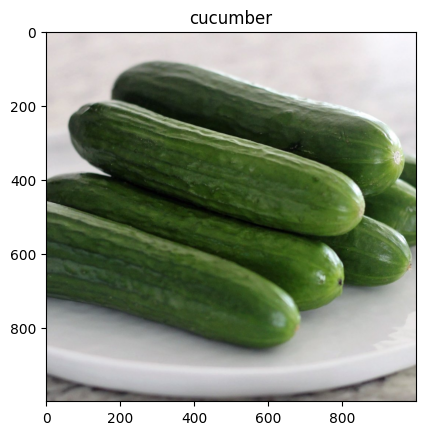

In [6]:
sample = random.choice(ds)
plt.imshow(sample[0])
plt.title(ds.classes[sample[1]])

# Single step downloader

Testing the single step convenience method.

In [2]:
dl = data.get_fruits(localdir="/mnt/e/torch/fruits")

Worker thread #0 started.
Worker thread #1 started.
Worker thread #2 started.
Worker thread #3 started.
Worker thread #4 started.
Worker thread #5 started.
Worker thread #6 started.
Worker thread #7 started.
Worker thread #8 started.
Worker thread #9 started.
Worker thread #10 started.
Worker thread #11 started.


Merging...: 100%|██████████| 2.13G/2.13G [00:16<00:00, 127MB/s]00, 14.1MB/s]   


Done!


In [3]:
train_sample = random.choice(dl["train_dataset"])
val_sample = random.choice(dl["val_dataset"])
test_sample = random.choice(dl["test_dataset"])

cl_names = dl["train_dataset"].classes

Text(0.5, 1.0, 'grapes')

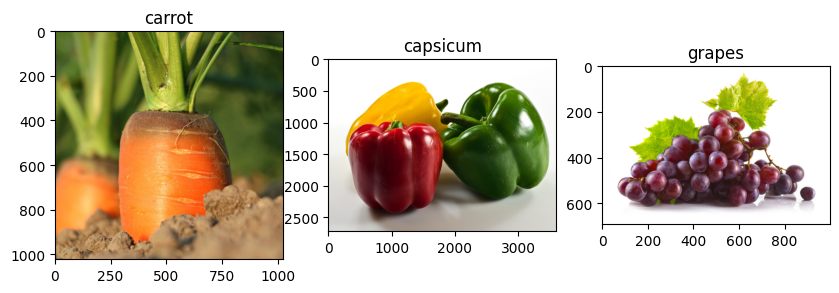

In [4]:
f, a = plt.subplots(1, 3, figsize=(10, 3))
a[0].imshow(train_sample[0])
a[0].set_title(cl_names[train_sample[1]])
a[1].imshow(val_sample[0])
a[1].set_title(cl_names[val_sample[1]])
a[2].imshow(test_sample[0])
a[2].set_title(cl_names[test_sample[1]])